# Exercise: Feature Extraction in OpenCV

In this exercise, we extract important image features like gradients, edges and corners in OpenCV. This is fundamental for image interpretation and object recognition. Your tasks are the following:

- Calculate image gradients and plot the result
- Detect edges using Canny edge detector
- Detect corners using Harris corner detector

In [47]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Acquision

In [48]:
# load image
input_img = cv2.imread ('../../images/san_francisco_bay.jpg') 

# convert image to RGB and grayscale (matplotlib uses RGB, OpenCV uses BGR)
img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, ' San Francisco Bay')

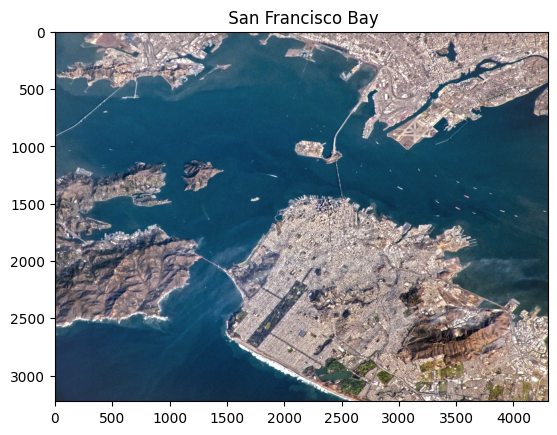

In [49]:
# display image
plt.imshow(img_RGB)
plt.title(' San Francisco Bay')

## 2. Image Manipulation and Preprocessing

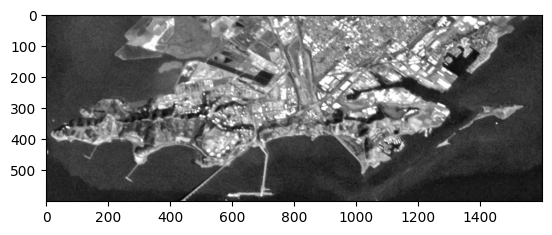

In [50]:
# we can make a cutout to work with a smaller part of the image (slicing)
cutout_RGB = img_RGB[0:600, 0:1600]
# cutout_RGB = img_RGB[0:img_RGB.shape[0], 0:img_RGB.shape[1]]
cutout_gray = cv2.cvtColor(cutout_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(cutout_gray, cmap='gray')

## 3. Feature Extraction

**TODO**: Calculate the gradient in `x` and in `y` of the cutout, respectively, using the Sobel operator, and plot the gradient images. Calculate the magnitude of the gradient and plot it as well. Finally, threshold the gradient and plot a binary image of the gradients (white if a pixel's gradient is above the threshold, black otherwise)

Text(0.5, 1.0, 'normalizedMagnitude')

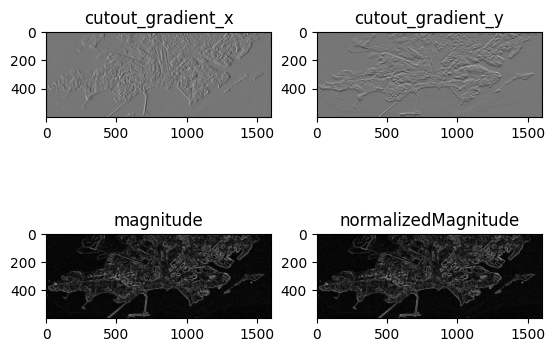

In [51]:
# TODO: YOUR CODE GOES HERE
cutout_gradient_x = cv2.Sobel(cutout_gray,cv2.CV_64F,1,0,ksize=9)
cutout_gradient_y = cv2.Sobel(cutout_gray,cv2.CV_64F,0,1,ksize=9)

magnitude = cv2.magnitude(cutout_gradient_x, cutout_gradient_y)

normalizedMagnitude = np.zeros(np.shape(magnitude))
normalizedMagnitude = cv2.normalize(magnitude, normalizedMagnitude, 0, 255, cv2.NORM_MINMAX)

ret, thresh = cv2.threshold(normalizedMagnitude,20,255,cv2.THRESH_BINARY)

plt.subplot(2,2,1),plt.imshow(cutout_gradient_x,cmap='gray')
plt.title('cutout_gradient_x')
plt.subplot(2,2,2),plt.imshow(cutout_gradient_y,cmap='gray')
plt.title('cutout_gradient_y')
plt.subplot(2,2,3),plt.imshow(magnitude,cmap='gray')
plt.title('magnitude')
plt.subplot(2,2,4),plt.imshow(normalizedMagnitude,cmap='gray')
plt.title('normalizedMagnitude')

**TODO**: Blur the image to remove noise. Then apply the Canny edge detector to extract edges in the blurred image. Plot the detected edges in the original image. Can you adapt the Canny detector parameters to improve your result?

**HINT:** Check out OpenCV's GaussianBlur() and Canny() functions!

Text(0.5, 1.0, 'blurred_img')

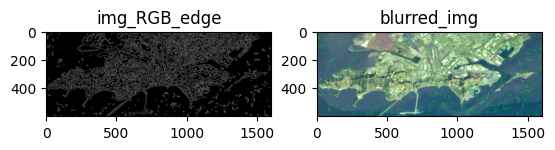

In [52]:
# TODO: YOUR CODE GOES HERE
threshold1 = 10
threshold2 = 50
blur_radius = 3

blurred_img = cutout_RGB.copy()
blurred_img = cv2.GaussianBlur(blurred_img, (2*blur_radius+1, 2*blur_radius+1), -1)

gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_RGB2GRAY)
img_RGB_edge = cv2.Canny(blurred_img, threshold1, threshold2)

blurred_img[img_RGB_edge != 0] = (0, 255, 0)

plt.subplot(121),plt.imshow(img_RGB_edge,cmap = 'gray')
plt.title('img_RGB_edge')
plt.subplot(122),plt.imshow(blurred_img)
plt.title('blurred_img')

In [53]:
# new cutout for corner detection (copy to avoid changing the original image)
cutout_RGB_2 = img_RGB[1200:2000, 1500:3500].copy()
cutout_gray_2 = cv2.cvtColor(cutout_RGB_2, cv2.COLOR_RGB2GRAY)

**TODO**: Apply the Harris detector to extract object corners in the new cutout defined above. Plot the detected corners in red into `cutout_RGB_2`. Can you adapt the Harris parameters to improve your result?

**HINT:** You can use OpenCV's cornerHarris() function!

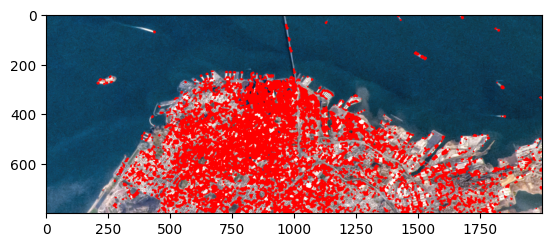

In [54]:
# TODO: YOUR CODE GOES HERE
blocksize= 9
kernel_size = 5
img_corner = cv2.cornerHarris(cutout_gray_2, blocksize, kernel_size,  0.01)
cutout_RGB_2[img_corner>0.02*img_corner.max()]=[255,0,0]
plt.imshow(cutout_RGB_2)
plt.show()